In [3]:
!pip install ase dscribe matplotlib seaborn scikit-learn tensorflow
# pip install --upgrade pip
!pip install tensorflow

  Obtaining dependency information for numpy>=1.15.0 from https://files.pythonhosted.org/packages/5a/13/25a83b9aae5fe9460b1997f5ba48814783d7f460bbbd8cadd96e1481ddf0/numpy-1.19.5-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for six~=1.15.0 from https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions~=3.7.4 from https://files.pythonhosted.org/packages/60/7a/e881b5abb54db0e6e671ab088d079c57ce54e8a01a3ca443f561ccadb37e/typing_extensions-3.7.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for wheel~=0.35 from https://files.pythonhosted.org/packages/7d/cd/d7460c9a869b16c3dd4e1e403cce337df165368c71d6af229a74699622ce/wheel-0.43.0-py3-none-any.whl.metadata
  Using cached wrapt-1.12.1-cp38-cp38-win_amd64.whl
  Obtaining dependency information for grpcio~=1.32.0 from https://files.pythonhosted.org/packages/d9/4

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\Lib\\site-packages\\wrapt\\__init__.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for numpy~=1.19.2 from https://files.pythonhosted.org/packages/5a/13/25a83b9aae5fe9460b1997f5ba48814783d7f460bbbd8cadd96e1481ddf0/numpy-1.19.5-cp38-cp38-win_amd64.whl.metadata
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl.metadata (2.0 kB)
  Obtaining dependency information for six~=1.15.0 from https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl.metadata
  Using cached six-1.15.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Obtaining dependency information for typing-extensions~=3.7.4 from https://files.pythonhosted.org/packages/60/7a/e881b5abb54db0e6e671ab088d079c57ce54e8a01a3ca443f561ccadb37e/typing_extensions-3.7.4.3-py3-none-any.whl.metadata
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl.metadata (2.0 kB)
  Obtaining dependency information for wheel~=0.35 from https://files.pythonhosted.org/packages/7d/cd/d7460c9a869b16c3dd4e1e403cce337df165368c71d6

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\Lib\\site-packages\\wrapt\\__init__.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from dscribe.descriptors import SOAP
from ase.io import read, write
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.decomposition import KernelPCA
from matplotlib.colors import Normalize
from tensorflow.keras.regularizers import L1, L2

C:\Users\Dylan\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
path_to_POSCAR_MBT_labeled = 'DFT_CONTCARs_MBT/'
path_to_POSCAR_MBT_unlabeled = 'random_5000_unlabelled_POSCARs/'

In [8]:
## Read POSCARs file and extract the information
def read_POSCAR(file_path):

    poscar_info_list = []
    atomic_species_list = []
    unique_atomic_species_list = set()
    
    for file in os.listdir(file_path):
        if file.endswith('.vasp'):
            print(file)
            poscar_path = os.path.join(file_path, file)
            poscar = read(poscar_path, format='vasp')
            poscar_info_list.append(poscar)
            atomic_species_list.append(poscar.get_chemical_symbols())
            for atoms in atomic_species_list:
                unique_atomic_species_list.update(poscar.get_chemical_symbols())
    return poscar_info_list, atomic_species_list, list(unique_atomic_species_list)

poscar_info_list_labeled, atomic_species_list_labeled, unique_atomic_species_list_labeled = read_POSCAR(path_to_POSCAR_MBT_labeled)
poscar_info_list_unlabeled, atomic_species_list_unlabeled, unique_atomic_species_list_unlabeled = read_POSCAR(path_to_POSCAR_MBT_unlabeled)

POSCAR-JVASP-Mn1Ag1Bi4S8.vasp
POSCAR-JVASP-Mn1Ag1Bi4Se8.vasp
POSCAR-JVASP-Mn1Ag1Bi4Te8.vasp
POSCAR-JVASP-Mn1Ag1Pb4S8.vasp
POSCAR-JVASP-Mn1Ag1Pb4Se8.vasp
POSCAR-JVASP-Mn1Ag1Pb4Te8.vasp
POSCAR-JVASP-Mn1Ag1Sb4S8.vasp
POSCAR-JVASP-Mn1Ag1Sb4Se8.vasp
POSCAR-JVASP-Mn1Ag1Sb4Te8.vasp
POSCAR-JVASP-Mn1Ag1Sn4S8.vasp
POSCAR-JVASP-Mn1Ag1Sn4Se8.vasp
POSCAR-JVASP-Mn1Ag1Sn4Te8.vasp
POSCAR-JVASP-Mn1Cd1Bi4S8.vasp
POSCAR-JVASP-Mn1Cd1Bi4Se8.vasp
POSCAR-JVASP-Mn1Cd1Bi4Te8.vasp
POSCAR-JVASP-Mn1Cd1Pb4S8.vasp
POSCAR-JVASP-Mn1Cd1Pb4Se8.vasp
POSCAR-JVASP-Mn1Cd1Pb4Te8.vasp
POSCAR-JVASP-Mn1Cd1Sb4S8.vasp
POSCAR-JVASP-Mn1Cd1Sb4Se8.vasp
POSCAR-JVASP-Mn1Cd1Sb4Te8.vasp
POSCAR-JVASP-Mn1Cd1Sn4S8.vasp
POSCAR-JVASP-Mn1Cd1Sn4Se8.vasp
POSCAR-JVASP-Mn1Cd1Sn4Te8.vasp
POSCAR-JVASP-Mn1Co1Bi4S8.vasp
POSCAR-JVASP-Mn1Co1Bi4Se8.vasp
POSCAR-JVASP-Mn1Co1Bi4Te8.vasp
POSCAR-JVASP-Mn1Co1Pb4S8.vasp
POSCAR-JVASP-Mn1Co1Pb4Se8.vasp
POSCAR-JVASP-Mn1Co1Pb4Te8.vasp
POSCAR-JVASP-Mn1Co1Sb4S8.vasp
POSCAR-JVASP-Mn1Co1Sb4Se8.vasp
POSCAR-JVASP-Mn1Co1

In [9]:
## Extract the SOAP descriptors
def get_SOAP_descriptor(poscar_info_list, unique_atomic_species_list, r_cut, n_max, l_max):
    
    soap = SOAP(species = unique_atomic_species_list,
                r_cut = r_cut,
                n_max = n_max,
                l_max = l_max,
                sigma = 0.5,    # default: 1.0
                rbf = 'gto',    # deafult: 'gto'
                average = 'inner',  # default: 'off'
                periodic = True,  # default: False
                sparse = False)    # default: False
    soap_desc = []
    for struct in poscar_info_list:
        soap_struct = soap.create(struct)
        soap_desc.append(soap_struct)
    return np.vstack(soap_desc)

## call the SOAP function
soap_desc_labeled = get_SOAP_descriptor(poscar_info_list_labeled,unique_atomic_species_list_labeled, 9.0, 6, 5)
soap_desc_unlabeled = get_SOAP_descriptor(poscar_info_list_unlabeled, unique_atomic_species_list_unlabeled, 9.0, 6, 5)
soap_desc_combined = np.vstack((soap_desc_labeled, soap_desc_unlabeled))

In [154]:
def perform_pca(soap_desc, optimal_components):
    pca = PCA(n_components = optimal_components)
    soap_pca = pca.fit_transform(soap_desc)
    return soap_pca

optimized_pca_combined = perform_pca(soap_desc_combined, 256)
scaler = StandardScaler()
X = scaler.fit_transform(optimized_pca_combined)
latent_size = 64
input_dim = X.shape[1]

In [155]:
print(y_combined)

[[-1.39368776  2.2775    ]
 [-1.8066236   2.2795    ]
 [-1.04476075  2.2615    ]
 ...
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]


In [156]:
# Load labelled data
monolayer_MBT_DFT_data = pd.read_csv('id_props_240_labelled_data_MBT.csv')
y = monolayer_MBT_DFT_data[['Ef_per_cell', 'Mu_per_cell']]

# Create a mask for the labelled data
mask = np.zeros(X.shape[0])
mask[:len(y)] = 1  # First len(y) entries are labelled
#mask = tf.constant(mask, dtype=tf.bool)  # Convert mask to TensorFlow tensor

nan = np.empty((1,2))
nan[:] = np.nan
stacked = np.tile(nan, (X.shape[0] - y.values.shape[0],1))
# Create a combined target array with zeros for unlabelled data
y_combined = np.vstack((y.values, stacked))
print(y_combined.shape)

(5240, 2)


In [157]:
# # Load labelled data
# monolayer_MBT_DFT_data = pd.read_csv('id_props_240_labelled_data_MBT.csv')
# y = monolayer_MBT_DFT_data[['Ef_per_cell', 'Mu_per_cell']]

# len_nan_values = X.shape[0]-y.shape[0]
# nan_values = np.full((len_nan_values,y.shape[1]),np.nan)
# y_combined = np.vstack((y.values, nan_values))

In [158]:
# # Define a custom loss function
# def custom_loss(y_true, y_pred):
#     batch_size = tf.shape(y_true)[0]
#     mask_tensor = tf.slice(mask, [0], [batch_size])
    
#     y_true_masked = tf.boolean_mask(y_true, mask_tensor)
#     y_pred_masked = tf.boolean_mask(y_pred, mask_tensor)
    
#     mse = tf.keras.losses.MeanSquaredError()
#     mse_masked_ef = mse(y_true_masked[:, 0], y_pred_masked[:, 0])
#     mse_masked_mu = mse(y_true_masked[:, 1], y_pred_masked[:, 1])
    
#     average_mse_masked = (mse_masked_ef + mse_masked_mu) / 2.0
#     return average_mse_masked

In [159]:
print(np.sum(np.isnan(y_combined))/2)

5000.0


In [160]:
# random_array = np.random.rand(444, 2)
# r2_check = custom_mse(y_train, random_array)
# r2_check

In [161]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [162]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError

def custom_mse(y_true, y_pred):
    mask = ~tf.math.is_nan(y_true[:, 0])
    y_true = tf.where(tf.math.is_nan(y_true), tf.zeros_like(y_true), y_true)

    y_pred_true = tf.boolean_mask(y_pred, mask)
    y_true_true = tf.boolean_mask(y_true, mask)

    mse = tf.keras.losses.mean_squared_error(y_true_true, y_pred_true)
    
    # to get the average, we only want to divide by the number of labeled examples 
    num_labeled_examples = tf.reduce_sum(tf.cast(mask, tf.float32))
    if num_labeled_examples < 1:
        avg_loss = 0.0
    else:
        avg_loss = tf.reduce_sum(mse) / num_labeled_examples

    # Debugging statement
    if tf.reduce_any(tf.math.is_nan(avg_loss)):
        tf.print("NaN detected in custom_mse loss calculation.")
    
    return avg_loss

In [176]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

# Normalize data
X_train = np.nan_to_num(X_train)
X_val = np.nan_to_num(X_val)
X_test = np.nan_to_num(X_test)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / (std + 1e-8)
X_val = (X_val - mean) / (std + 1e-8)
X_test = (X_test - mean) / (std + 1e-8)

input_dim = X_train.shape[1]
latent_size = 32
target_dim = y_train.shape[1]
lr_autoencoder = 2.5e-3
lr_combined = 2.5e-3  # Reduced learning rate for combined model
epochs = 150
batch_size = 128

# Encoder
encoder_input = Input(shape=(input_dim,))
encoder_input_norm = BatchNormalization()(encoder_input)
encoder_hidden = Dense(input_dim, activation='selu', kernel_initializer='lecun_normal')(encoder_input_norm)
encoder_hidden = BatchNormalization()(encoder_hidden)
encoder_hidden = Dense(latent_size, activation='selu', kernel_initializer='lecun_normal')(encoder_hidden)
encoder_hidden = BatchNormalization()(encoder_hidden)
encoder_output = Dense(latent_size, activation='selu', kernel_initializer='lecun_normal')(encoder_hidden)


# Decoder
decoder_input = BatchNormalization()(encoder_output)
decoder_hidden = Dense(latent_size, activation='selu', kernel_initializer='lecun_normal')(decoder_input)
decoder_hidden = BatchNormalization()(decoder_hidden)
decoder_hidden = Dense(latent_size, activation='selu', kernel_initializer='lecun_normal')(decoder_hidden)
decoder_hidden = BatchNormalization()(decoder_hidden)
decoder_hidden = Dense(input_dim, activation='selu', kernel_initializer='lecun_normal')(decoder_hidden)
decoder_hidden = BatchNormalization()(decoder_hidden)
decoder_output = Dense(input_dim, activation='linear', kernel_initializer='lecun_normal')(decoder_hidden)

# Autoencoder
autoencoder = Model(inputs=encoder_input, outputs=decoder_output)
autoencoder.compile(optimizer=Adam(learning_rate=lr_autoencoder), loss=MeanSquaredError())

# FFNN
ffnn_input = BatchNormalization()(encoder_output)
ffnn_hidden = Dense(latent_size, activation='selu', kernel_initializer='lecun_normal')(ffnn_input)
ffnn_hidden = BatchNormalization()(ffnn_hidden)
ffnn_hidden = Dense(latent_size, activation='selu', kernel_initializer='lecun_normal')(ffnn_hidden)
ffnn_hidden = BatchNormalization()(ffnn_hidden)
ffnn_output = Dense(target_dim, activation='linear', kernel_initializer='lecun_normal')(ffnn_hidden)

# Combined Model
combined_output = [decoder_output, ffnn_output]
combined_model = Model(inputs=encoder_input, outputs=combined_output)
combined_model.compile(optimizer=Adam(learning_rate=lr_combined), loss=[MeanSquaredError(), custom_mse],
                       loss_weights=[1, 22], metrics=[MeanSquaredError(), custom_mse])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
y_val_final = np.nan_to_num(y_val)
history_test = combined_model.fit(X_train, [X_train, y_train], validation_data=(X_val, [X_val, y_val_final]), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/150
25/25 [==============================] - 4s 60ms/step - loss: 10.6454 - dense_326_loss: 1.3653 - dense_329_loss: 0.4218 - dense_326_mean_squared_error: 1.3652 - dense_326_custom_mse: 1.3652 - dense_329_mean_squared_error: 0.4218 - dense_329_custom_mse: 0.4218 - val_loss: 6.6256 - val_dense_326_loss: 1.1318 - val_dense_329_loss: 0.2497 - val_dense_326_mean_squared_error: 1.1458 - val_dense_326_custom_mse: 1.1458 - val_dense_329_mean_squared_error: 0.2568 - val_dense_329_custom_mse: 0.2568
Epoch 2/150
25/25 [==============================] - 1s 28ms/step - loss: 3.1094 - dense_326_loss: 0.9927 - dense_329_loss: 0.0962 - dense_326_mean_squared_error: 0.9928 - dense_326_custom_mse: 0.9928 - dense_329_mean_squared_error: 0.0962 - dense_329_custom_mse: 0.0962 - val_loss: 6.6037 - val_dense_326_loss: 1.0622 - val_dense_329_loss: 0.2519 - val_dense_326_mean_squared_error: 1.0739 - val_dense_326_custom_mse: 1.0739 - val_dense_329_mean_squared_error: 0.2517 - val_dense_329_custom_mse

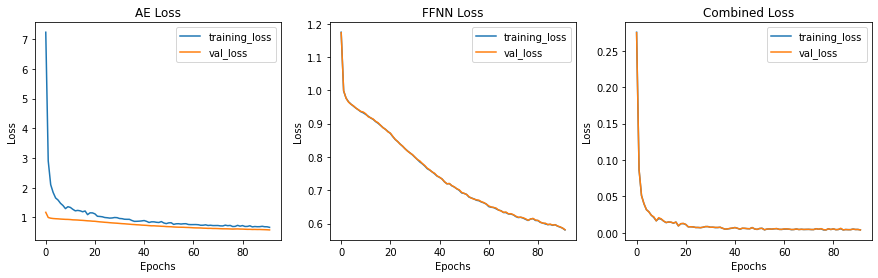

In [184]:
fig,ax = plt.subplots(1,3, figsize = (15,4))
title = ['AE Loss', 'FFNN Loss', 'Combined Loss']
keys = list(history_test.history.keys())
key_pairs = [(keys[i], keys[i+3]) for i in range(3)]

for i in range(3):
    ax[i].plot(history_test.history[key_pairs[i][0]], label='training_loss')
    ax[i].plot(history_test.history[key_pairs[i][1]], label='val_loss')

    ax[i].set_title(title[i])
    ax[i].legend()
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Loss')
plt.savefig("loss_figures.png", dpi=300)

In [178]:
import numpy as np
from sklearn import metrics

# Predictions
pred_train_test_NaN = combined_model.predict(X_train)
pred_val_test_NaN = combined_model.predict(X_val)
pred_test_test_NaN = combined_model.predict(X_test)

# Ensure predictions do not contain NaNs
pred_train_test_NaN = [np.nan_to_num(pred) for pred in pred_train_test_NaN]
pred_val_test_NaN = [np.nan_to_num(pred) for pred in pred_val_test_NaN]
pred_test_test_NaN = [np.nan_to_num(pred) for pred in pred_test_test_NaN]

# Ensure y values do not contain NaNs
y_train = np.nan_to_num(y_train)
y_val = np.nan_to_num(y_val)
y_test = np.nan_to_num(y_test)

# Masks
mask_train_labeled = ~np.equal(y_train, 0).any(axis=1)
mask_val_labeled = ~np.equal(y_val, 0).any(axis=1)
mask_test_labeled = ~np.equal(y_test, 0).any(axis=1)

# Compute evaluation metrics for the labeled training data
r2_train_ef_test_NaN = metrics.r2_score(y_train[mask_train_labeled][:, 0], pred_train_test_NaN[1][mask_train_labeled][:, 0])
r2_train_mu_test_NaN = metrics.r2_score(y_train[mask_train_labeled][:, 1], pred_train_test_NaN[1][mask_train_labeled][:, 1])

mae_train_ef_test_NaN = metrics.mean_absolute_error(y_train[mask_train_labeled][:, 0], pred_train_test_NaN[1][mask_train_labeled][:, 0])
mae_train_mu_test_NaN = metrics.mean_absolute_error(y_train[mask_train_labeled][:, 1], pred_train_test_NaN[1][mask_train_labeled][:, 1])

# Compute evaluation metrics for the labeled validation data
r2_val_ef_test_NaN = metrics.r2_score(y_val[mask_val_labeled][:, 0], pred_val_test_NaN[1][mask_val_labeled][:, 0])
r2_val_mu_test_NaN = metrics.r2_score(y_val[mask_val_labeled][:, 1], pred_val_test_NaN[1][mask_val_labeled][:, 1])

mae_val_ef_test_NaN = metrics.mean_absolute_error(y_val[mask_val_labeled][:, 0], pred_val_test_NaN[1][mask_val_labeled][:, 0])
mae_val_mu_test_NaN = metrics.mean_absolute_error(y_val[mask_val_labeled][:, 1], pred_val_test_NaN[1][mask_val_labeled][:, 1])

# Compute evaluation metrics for the labeled test data
r2_test_ef_test_NaN = metrics.r2_score(y_test[mask_test_labeled][:, 0], pred_test_test_NaN[1][mask_test_labeled][:, 0])
r2_test_mu_test_NaN = metrics.r2_score(y_test[mask_test_labeled][:, 1], pred_test_test_NaN[1][mask_test_labeled][:, 1])

mae_test_ef_test_NaN = metrics.mean_absolute_error(y_test[mask_test_labeled][:, 0], pred_test_test_NaN[1][mask_test_labeled][:, 0])
mae_test_mu_test_NaN = metrics.mean_absolute_error(y_test[mask_test_labeled][:, 1], pred_test_test_NaN[1][mask_test_labeled][:, 1])

width = 10
print(f'{"Properties":>{width+1}} {"R2(Train)":>{width+1}} {"R2(Val)":>{width-1}} {"R2(Test)":>{width}} {"MAE(Train)":>{width+2}} {"MAE(Val)":>{width}} {"MAE(Test)":>{width}}')
print('='*80)
print(f'{"Ef":>{width}} {r2_train_ef_test_NaN:>{width}.3f} {r2_val_ef_test_NaN:>{width}.3f} {r2_test_ef_test_NaN:>{width}.3f} {mae_train_ef_test_NaN:>{width}.3f} {mae_val_ef_test_NaN:>{width}.3f} {mae_test_ef_test_NaN:>{width}.3f}')
print(f'{"Mu":>{width}} {r2_train_mu_test_NaN:>{width}.3f} {r2_val_mu_test_NaN:>{width}.3f} {r2_test_mu_test_NaN:>{width}.3f} {mae_train_mu_test_NaN:>{width}.3f} {mae_val_mu_test_NaN:>{width}.3f} {mae_test_mu_test_NaN:>{width}.3f}')


 Properties   R2(Train)   R2(Val)   R2(Test)   MAE(Train)   MAE(Val)  MAE(Test)
        Ef      0.984      0.885      0.904      0.111      0.266      0.289
        Mu      0.952      0.735      0.872      0.148      0.313      0.225


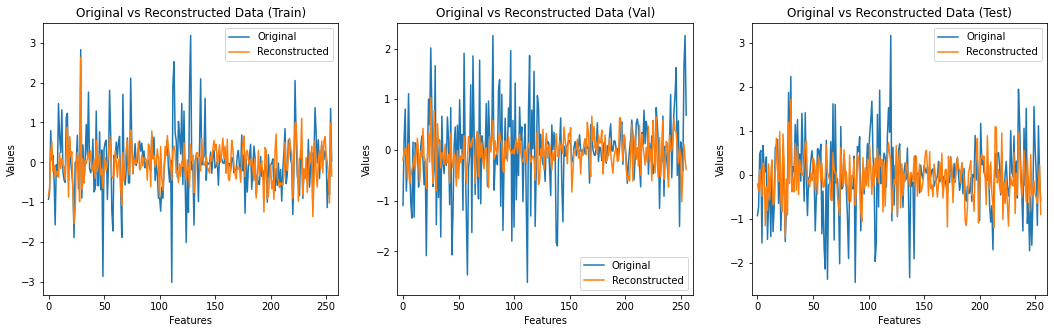

<Figure size 432x288 with 0 Axes>

In [185]:
reconstructed_X_train = autoencoder.predict(X_train)
reconstructed_X_val = autoencoder.predict(X_val)
reconstructed_X_test = autoencoder.predict(X_test)

sample_idx_train = X_train[0]
sample_idx_val = X_val[0]
sample_idx_test = X_test[0]

fig, ax = plt.subplots(1,3, figsize = (18,5))

ax[0].plot(X_train[0], label = 'Original')
ax[1].plot(X_val[0], label = 'Original')
ax[2].plot(X_test[0], label = 'Original')

ax[0].plot(reconstructed_X_train[0], label = 'Reconstructed')
ax[1].plot(reconstructed_X_val[0], label = 'Reconstructed')
ax[2].plot(reconstructed_X_test[0], label = 'Reconstructed')

ax[0].set_xlabel('Features')
ax[0].set_ylabel('Values')

ax[1].set_xlabel('Features')
ax[1].set_ylabel('Values')

ax[2].set_xlabel('Features')
ax[2].set_ylabel('Values')

ax[0].set_title('Original vs Reconstructed Data (Train)')
ax[1].set_title('Original vs Reconstructed Data (Val)')
ax[2].set_title('Original vs Reconstructed Data (Test)')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim([-5, X.shape[1]+5])
ax[1].set_xlim([-5, X.shape[1]+5])
ax[2].set_xlim([-5, X.shape[1]+5])

plt.show()

plt.savefig("reconstruction_figure.png", dpi=300)

In [186]:
pred_train = combined_model.predict(X_train)#, [X_train, y_train])
pred_val = combined_model.predict(X_val)#, [X_val, y_val])
pred_test = combined_model.predict(X_test)#, [X_test, y_test])

In [187]:
mask_train_labeled = ~np.equal(y_train,0).any(axis=1)
mask_val_labeled = ~np.equal(y_val,0).any(axis=1)
mask_test_labeled = ~np.equal(y_test,0).any(axis=1)

# Compute evaluation metrics for the labeled training data
r2_train_ef = metrics.r2_score(y_train[mask_train_labeled][:, 0], pred_train[1][mask_train_labeled][:, 0])
r2_train_mu = metrics.r2_score(y_train[mask_train_labeled][:, 1], pred_train[1][mask_train_labeled][:, 1])

mae_train_ef = metrics.mean_absolute_error(y_train[mask_train_labeled][:, 0], pred_train[1][mask_train_labeled][:, 0])
mae_train_mu = metrics.mean_absolute_error(y_train[mask_train_labeled][:, 1], pred_train[1][mask_train_labeled][:, 1])

# Compute evaluation metrics for the labeled validation data
r2_val_ef = metrics.r2_score(y_val[mask_val_labeled][:, 0], pred_val[1][mask_val_labeled][:, 0])
r2_val_mu = metrics.r2_score(y_val[mask_val_labeled][:, 1], pred_val[1][mask_val_labeled][:, 1])

mae_val_ef = metrics.mean_absolute_error(y_val[mask_val_labeled][:, 0], pred_val[1][mask_val_labeled][:, 0])
mae_val_mu = metrics.mean_absolute_error(y_val[mask_val_labeled][:, 1], pred_val[1][mask_val_labeled][:, 1])

# Compute evaluation metrics for the labeled test data
r2_test_ef = metrics.r2_score(y_test[mask_test_labeled][:, 0], pred_test[1][mask_test_labeled][:, 0])
r2_test_mu = metrics.r2_score(y_test[mask_test_labeled][:, 1], pred_test[1][mask_test_labeled][:, 1])

mae_test_ef = metrics.mean_absolute_error(y_test[mask_test_labeled][:, 0], pred_test[1][mask_test_labeled][:, 0])
mae_test_mu = metrics.mean_absolute_error(y_test[mask_test_labeled][:, 1], pred_test[1][mask_test_labeled][:, 1])

width = 10
print(f'{"Properties":>{width+1}} {"R2(Train)":>{width+1}} {"R2(Val)":>{width-1}} {"R2(Test)":>{width}} {"MAE(Train)":>{width+2}} {"MAE(Val)":>{width}} {"MAE(Test)":>{width}}')
print('='*80)
print(f'{"Ef":>{width}} {r2_train_ef:>{width}.3f} {r2_val_ef:>{width}.3f} {r2_test_ef:>{width}.3f} {mae_train_ef:>{width}.3f} {mae_val_ef:>{width}.3f} {mae_test_ef:>{width}.3f}')
print(f'{"Mu":>{width}} {r2_train_mu:>{width}.3f} {r2_val_mu:>{width}.3f} {r2_test_mu:>{width}.3f} {mae_train_mu:>{width}.3f} {mae_val_mu:>{width}.3f} {mae_test_mu:>{width}.3f}')

 Properties   R2(Train)   R2(Val)   R2(Test)   MAE(Train)   MAE(Val)  MAE(Test)
        Ef      0.984      0.885      0.904      0.111      0.266      0.289
        Mu      0.952      0.735      0.872      0.148      0.313      0.225


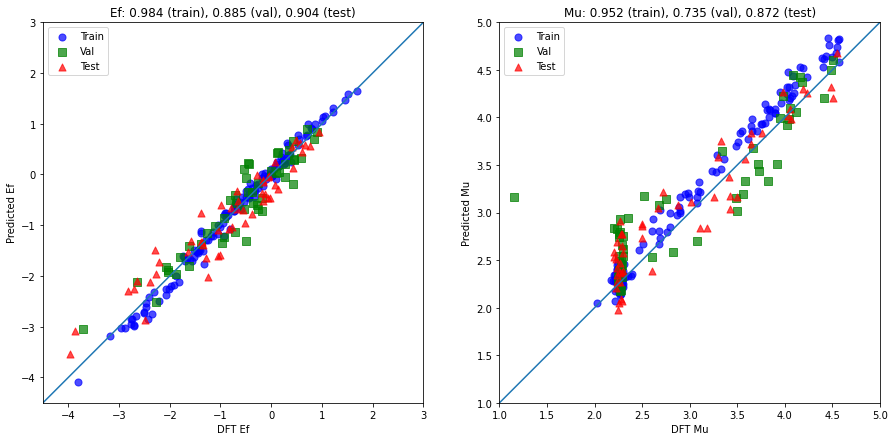

<Figure size 432x288 with 0 Axes>

In [188]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.scatter(y_train[mask_train_labeled][:, 0], pred_train[1][mask_train_labeled][:, 0], color = 'blue', alpha = 0.7, s = 50, marker = 'o', label = 'Train')
ax1.scatter(y_val[mask_val_labeled][:, 0], pred_val[1][mask_val_labeled][:, 0], color = 'green', alpha = 0.7, s = 50, marker = 's', label = 'Val')
ax1.scatter(y_test[mask_test_labeled][:, 0], pred_test[1][mask_test_labeled][:, 0], color = 'red', alpha = 0.7, s = 50, marker = '^', label = 'Test')
ax1.plot([-4.5, 3], [-4.5, 3])

ax2.scatter(y_train[mask_train_labeled][:, 1], pred_train[1][mask_train_labeled][:, 1], color = 'blue', alpha = 0.7, s = 50, marker = 'o', label = 'Train')
ax2.scatter(y_val[mask_val_labeled][:, 1], pred_val[1][mask_val_labeled][:, 1], color = 'green', alpha = 0.7, s = 50, marker = 's', label = 'Val')
ax2.scatter(y_test[mask_test_labeled][:, 1], pred_test[1][mask_test_labeled][:, 1], color = 'red', alpha = 0.7, s = 50, marker = '^', label = 'Test')
ax2.plot([0, 5], [0, 5])

ax1.set_title('Ef: {:.3f} (train), {:.3f} (val), {:.3f} (test)'.format(r2_train_ef,r2_val_ef, r2_test_ef))
ax2.set_title('Mu: {:.3f} (train), {:.3f} (val), {:.3f} (test)'.format(r2_train_mu,r2_val_mu, r2_test_mu))

ax1.set_xlabel('DFT Ef')
ax1.set_ylabel('Predicted Ef')

ax2.set_xlabel('DFT Mu')
ax2.set_ylabel('Predicted Mu')

ax1.set_xlim([-4.5, 3])
ax1.set_ylim([-4.5, 3])

ax2.set_xlim([1, 5])
ax2.set_ylim([1, 5])

ax1.legend()
ax2.legend()

plt.show()

plt.savefig("r2s.png", dpi=300)

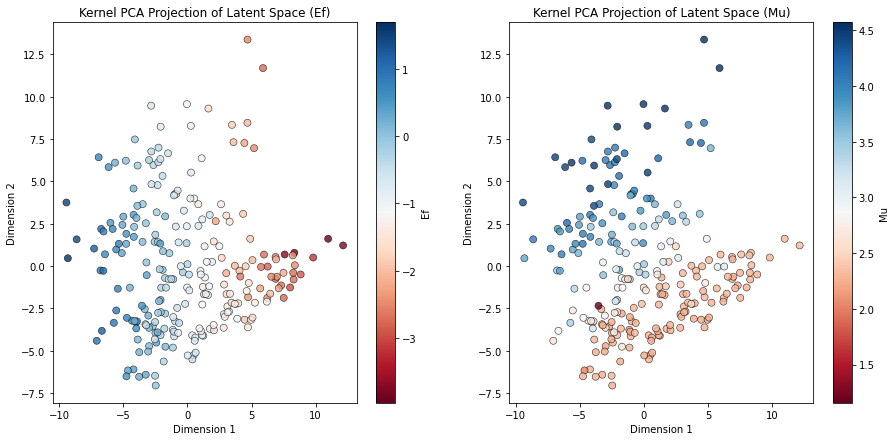

<Figure size 432x288 with 0 Axes>

In [189]:
# Extract latent representations
encoder_model = Model(inputs = encoder_input, outputs = encoder_output)
latent_X = encoder_model.predict(X[:240,:])

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='linear', gamma=None, fit_inverse_transform=True, alpha=1.0, n_jobs=-1)
kpca_embeddings = kpca.fit_transform(latent_X)

# Create a DataFrame for Seaborn
kpca_df = pd.DataFrame(data={'Dimension 1': kpca_embeddings[:, 0],
                             'Dimension 2': kpca_embeddings[:, 1],
                             'Ef': y['Ef_per_cell'],
                             'Mu': y['Mu_per_cell']})

# Visualize the projected latent space using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
scatter_ef = sns.scatterplot(ax=ax[0], data=kpca_df, x='Dimension 1', y='Dimension 2', hue='Ef', palette='RdBu', s=50, alpha=0.8, edgecolor='k', legend=False)
scatter_mu = sns.scatterplot(ax=ax[1], data=kpca_df, x='Dimension 1', y='Dimension 2', hue='Mu', palette='RdBu', s=50, alpha=0.8, edgecolor='k', legend=False)

norm_ef = Normalize(vmin=kpca_df['Ef'].min(), vmax=kpca_df['Ef'].max())
norm_mu = Normalize(vmin=kpca_df['Mu'].min(), vmax=kpca_df['Mu'].max())

sm_ef = plt.cm.ScalarMappable(cmap='RdBu', norm=norm_ef)
sm_mu = plt.cm.ScalarMappable(cmap='RdBu', norm=norm_mu)

sm_ef.set_array([])
sm_mu.set_array([])

cbar_ef = fig.colorbar(sm_ef, ax=ax[0])
cbar_mu = fig.colorbar(sm_mu, ax=ax[1])

cbar_ef.set_label('Ef')
cbar_mu.set_label('Mu')

ax[0].set_title('Kernel PCA Projection of Latent Space (Ef)')
ax[0].set_xlabel('Dimension 1')
ax[0].set_ylabel('Dimension 2')

ax[1].set_title('Kernel PCA Projection of Latent Space (Mu)')
ax[1].set_xlabel('Dimension 1')
ax[1].set_ylabel('Dimension 2')

plt.show()

plt.savefig("pca_deconstructions.png", dpi=300)

In [24]:
# !pip install optuna
# !pip install nbformat
import optuna
import optuna.importance
from optuna.visualization import plot_pareto_front, plot_param_importances, plot_parallel_coordinate, plot_intermediate_values

C:\Users\Romakanta\Desktop\vENVs\vSOAP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
def optuna_HP(trial):
    
    # Hyperparameters to tune
    dropout_encoder = trial.suggest_float('dropout_encoder', 0.0, 0.2)
    dropout_ffnn = trial.suggest_float('dropout_ffnn', 0.0, 0.5)
#    reg_L1_encoder = trial.suggest_float('reg_L1_encocder', 1e-5, 0.5)
#    reg_L1_ffnn = trial.suggest_float('reg_L1_ffnn', 1e-5, 0.5)
#    reg_L2_encoder = trial.suggest_float('reg_L2_encocder', 1e-5, 0.5)
#    reg_L2_ffnn = trial.suggest_float('reg_L2_ffnn', 1e-5, 0.5)
    learning_rate = trial.suggest_float('learniing_rate', 1e-4, 1e-2)
    
    # Tune encoder layer dimensions
    input_dim = X_train.shape[1]
#    layer1_dim_encoder = trial.suggest_int('layer1_dim_encoder', 50, input_dim)
    latent_dim_encoder = trial.suggest_int('latent_dim_encoder', 50, input_dim)
    
    # Tune FFNN layer dimensions
    layer1_dim_ffnn = trial.suggest_int('layer1_dim_ffnn', 20, latent_dim_encoder)
#    layer2_dim_ffnn = trial.suggest_int('layer2_dim_ffnn', 5, layer1_dim_ffnn)
    
    # Tune activation function
    activation_funcn = trial.suggest_categorical('activation_funcn', ['elu', 'relu', 'selu'])
    
    # Optimizer
    optimizer = Adam(learning_rate=learning_rate)
    
    # Model architecture
    encoder_input = keras.Input(shape = (input_dim,))
    encoder = Dropout(dropout_encoder)(encoder_input)
#    encoder = Dense(layer1_dim_encoder, activation=activation_funcn, kernel_regularizer=L1(reg_L1_encoder))(encoder)
#    encoder = Dropout(dropout_encoder)(encoder_input)
    encoder_output = Dense(latent_dim_encoder, activation=activation_funcn)(encoder)
    
    decoder = Dropout(dropout_encoder)(encoder_output)
    decoder_output = Dense(input_dim, activation = 'linear')(decoder)

    # autoencoder
    autoencoder = Model(inputs = encoder_input, outputs = decoder_output)
    autoencoder.compile(optimizer = Adam(learning_rate = learning_rate), loss=MeanSquaredError())    
    
    # FFNN
    ffnn_MBT_input = Dense(layer1_dim_ffnn, activation = activation_funcn)(encoder_output)
    ffnn_MBT = Dropout(dropout_ffnn)(ffnn_MBT_input)
#    ffnn_MBT = Dense(layer2_dim_ffnn, activation = activation_funcn)(ffnn_MBT_input)
#    ffnn_MBT = Dropout(dropout_ffnn)(ffnn_MBT)
    ffnn_MBT_output = Dense(2, activation = 'linear')(ffnn_MBT)

    # Combined model
    combined_output = [decoder_output, ffnn_MBT_output]
    combined_model = Model(inputs = encoder_input, outputs = combined_output)
    combined_model.compile(optimizer = optimizer, loss = [MeanSquaredError(), custom_mse], 
                           loss_weights = [1, 10], metrics = [MeanSquaredError, MeanAbsoluteError]) 

    # Training
    history = combined_model.fit(X_train, [X_train, y_train], validation_data = (X_val, [X_val, y_val]),
                                 epochs = 500, batch_size = 32, verbose = 0)

    
    pred_val = combined_model.predict(X_val)
        
    assert not np.isnan(pred_val[0]).any(), "Autoencoder predictions contain NaN values."
    assert not np.isnan(pred_val[1]).any(), "FFNN predictions contain NaN values."

    mask_val_labeled = ~np.equal(y_val,0).any(axis=1)
    r2_score_ef = metrics.r2_score(y_val[mask_val_labeled][:, 0], pred_val[1][mask_val_labeled][:, 0])
    r2_score_mu = metrics.r2_score(y_val[mask_val_labeled][:, 1], pred_val[1][mask_val_labeled][:, 1])
    
    return r2_score_ef,r2_score_mu

In [31]:
np.any(np.isnan(y_val))

False

In [27]:
# Create and optimize the study
study = optuna.create_study(directions = ['maximize','maximize'])
study.optimize(optuna_HP, n_trials=200)

[I 2024-06-13 11:17:32,839] A new study created in memory with name: no-name-73ccc118-29ad-4fcf-b04f-ff87bec947fb


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:18:17,426] Trial 0 finished with values: [0.7615973946766637, -0.04769360735617201] and parameters: {'dropout_encoder': 0.06847069345685589, 'dropout_ffnn': 0.34554114677280406, 'learniing_rate': 0.0035194540214672355, 'latent_dim_encoder': 87, 'layer1_dim_ffnn': 25, 'activation_funcn': 'relu'}. 


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000190ABBBD5E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2024-06-13 11:19:04,479] Trial 1 finished with values: [0.5622993151921178, -1.030524329929405] and parameters: {'dropout_encoder': 0.17454994210085756, 'dropout_ffnn': 0.3548955570205406, 'learniing_rate': 0.00448597205802017, 'latent_dim_encoder': 55, 'layer1_dim_ffnn': 46, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2024-06-13 11:19:52,273] Trial 2 finished with values: [0.7242156025191115, 0.20292017529323536] and parameters: {'dropout_encoder': 0.051312878965087676, 'dropout_ffnn': 0.32832171832339685, 'learniing_rate': 0.008178092771796996, 'latent_dim_encoder': 69, 'layer1_dim_ffnn': 52, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:20:38,648] Trial 3 finished with values: [0.7278278825423918, -1.3836676914971018] and parameters: {'dropout_encoder': 0.1739844952353555, 'dropout_ffnn': 0.44017099968660856, 'learniing_rate': 0.0044294957600727585, 'latent_dim_encoder': 56, 'layer1_dim_ffnn': 41, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2024-06-13 11:21:25,190] Trial 4 finished with values: [0.6836906681488071, 0.2326890791366205] and parameters: {'dropout_encoder': 0.193384984756827, 'dropout_ffnn': 0.19502660222613538, 'learniing_rate': 0.0076874952751779715, 'latent_dim_encoder': 65, 'layer1_dim_ffnn': 60, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2024-06-13 11:22:12,091] Trial 5 finished with values: [0.7366581228530453, 0.15118063258485281] and parameters: {'dropout_encoder': 0.134077012679499, 'dropout_ffnn': 0.480306239988614, 'learniing_rate': 0.0038693064177457623, 'latent_dim_encoder': 79, 'layer1_dim_ffnn': 35, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2024-06-13 11:23:01,069] Trial 6 finished with values: [0.7148284313713704, -0.32051532291234275] and parameters: {'dropout_encoder': 0.036272366902313995, 'dropout_ffnn': 0.1369268758280468, 'learniing_rate': 0.003977069005231046, 'latent_dim_encoder': 86, 'layer1_dim_ffnn': 58, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:23:50,434] Trial 7 finished with values: [0.5990239849749004, -0.3326989681874799] and parameters: {'dropout_encoder': 0.15030856495624206, 'dropout_ffnn': 0.47832319590302225, 'learniing_rate': 0.00975143785975889, 'latent_dim_encoder': 64, 'layer1_dim_ffnn': 20, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:24:41,632] Trial 8 finished with values: [0.7111570411146753, -0.800614733484974] and parameters: {'dropout_encoder': 0.08449361040745601, 'dropout_ffnn': 0.4029320186019293, 'learniing_rate': 0.0017232956570076433, 'latent_dim_encoder': 61, 'layer1_dim_ffnn': 28, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2024-06-13 11:25:32,615] Trial 9 finished with values: [0.6502572088269083, -0.6868624877526075] and parameters: {'dropout_encoder': 0.1645907073330158, 'dropout_ffnn': 0.22633776131691274, 'learniing_rate': 0.005811982923851043, 'latent_dim_encoder': 65, 'layer1_dim_ffnn': 43, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:26:24,579] Trial 10 finished with values: [0.8610130922364395, 0.21384524898050838] and parameters: {'dropout_encoder': 0.030421177169919125, 'dropout_ffnn': 0.4120207888280061, 'learniing_rate': 0.00443878781147089, 'latent_dim_encoder': 100, 'layer1_dim_ffnn': 89, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2024-06-13 11:27:12,735] Trial 11 finished with values: [0.60803926115499, 0.03525350026781082] and parameters: {'dropout_encoder': 0.11742806101532205, 'dropout_ffnn': 0.3111089645382475, 'learniing_rate': 0.006597410737903348, 'latent_dim_encoder': 52, 'layer1_dim_ffnn': 28, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:27:59,272] Trial 12 finished with values: [0.6615217603926542, -0.756961490458256] and parameters: {'dropout_encoder': 0.15007061669281743, 'dropout_ffnn': 0.47376465373135024, 'learniing_rate': 0.0015175703654785753, 'latent_dim_encoder': 81, 'layer1_dim_ffnn': 58, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:28:42,395] Trial 13 finished with values: [0.7391756417928017, 0.11666855218066718] and parameters: {'dropout_encoder': 0.17193887506290723, 'dropout_ffnn': 0.013569385258573985, 'learniing_rate': 0.0068101548331810525, 'latent_dim_encoder': 64, 'layer1_dim_ffnn': 50, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:29:25,993] Trial 14 finished with values: [0.7250589554504361, 0.3059805106767366] and parameters: {'dropout_encoder': 0.07130034053285554, 'dropout_ffnn': 0.11778556102697768, 'learniing_rate': 0.009331603861410909, 'latent_dim_encoder': 76, 'layer1_dim_ffnn': 60, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:30:09,052] Trial 15 finished with values: [0.6522900958254313, -0.6144501612205846] and parameters: {'dropout_encoder': 0.11807064525281544, 'dropout_ffnn': 0.08780081059853623, 'learniing_rate': 0.001791072163857808, 'latent_dim_encoder': 78, 'layer1_dim_ffnn': 36, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2024-06-13 11:30:58,303] Trial 16 finished with values: [0.6856938584578809, 0.41901949530698257] and parameters: {'dropout_encoder': 0.08948059154533657, 'dropout_ffnn': 0.06861660624488358, 'learniing_rate': 0.005824890196036879, 'latent_dim_encoder': 57, 'layer1_dim_ffnn': 41, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:31:46,747] Trial 17 finished with values: [0.7217495185444964, 0.5138919578865615] and parameters: {'dropout_encoder': 0.026370966450416547, 'dropout_ffnn': 0.22828431274712951, 'learniing_rate': 0.009418094946891248, 'latent_dim_encoder': 57, 'layer1_dim_ffnn': 52, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:32:34,563] Trial 18 finished with values: [0.6559169931879021, -0.17708737111352502] and parameters: {'dropout_encoder': 0.06455265501463425, 'dropout_ffnn': 0.2521958244998756, 'learniing_rate': 0.006021345172587313, 'latent_dim_encoder': 85, 'layer1_dim_ffnn': 76, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:33:19,464] Trial 19 finished with values: [0.7165764058006825, 0.11884004274700921] and parameters: {'dropout_encoder': 0.062406798525694133, 'dropout_ffnn': 0.12249519435743217, 'learniing_rate': 0.0038264360914846353, 'latent_dim_encoder': 87, 'layer1_dim_ffnn': 37, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:34:01,768] Trial 20 finished with values: [0.6890128189295239, 0.4723538949031775] and parameters: {'dropout_encoder': 0.047080511036340124, 'dropout_ffnn': 0.19367890617202088, 'learniing_rate': 0.007712986849575179, 'latent_dim_encoder': 51, 'layer1_dim_ffnn': 47, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:34:44,337] Trial 21 finished with values: [0.7215699697714665, 0.12842295108322987] and parameters: {'dropout_encoder': 0.08416432034189761, 'dropout_ffnn': 0.12307310312475606, 'learniing_rate': 0.004686871551621833, 'latent_dim_encoder': 95, 'layer1_dim_ffnn': 75, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:35:26,380] Trial 22 finished with values: [0.710769100774699, -0.2820331692204754] and parameters: {'dropout_encoder': 0.1884554892136159, 'dropout_ffnn': 0.1007620438735386, 'learniing_rate': 0.0023308473608521798, 'latent_dim_encoder': 58, 'layer1_dim_ffnn': 37, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:36:09,240] Trial 23 finished with values: [0.6969203551226224, -0.03216446914898974] and parameters: {'dropout_encoder': 0.024151871547693826, 'dropout_ffnn': 0.30056109307127515, 'learniing_rate': 0.005126994924193738, 'latent_dim_encoder': 93, 'layer1_dim_ffnn': 91, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:36:51,679] Trial 24 finished with values: [0.634929351206528, 0.025566121320212964] and parameters: {'dropout_encoder': 0.023475864231620094, 'dropout_ffnn': 0.036257273254320765, 'learniing_rate': 0.006682082365844738, 'latent_dim_encoder': 51, 'layer1_dim_ffnn': 49, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:37:33,919] Trial 25 finished with values: [0.6521712118179669, -1.090897938424927] and parameters: {'dropout_encoder': 0.16343674445171807, 'dropout_ffnn': 0.18006798915589617, 'learniing_rate': 0.0019962356849173124, 'latent_dim_encoder': 59, 'layer1_dim_ffnn': 21, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2024-06-13 11:38:16,080] Trial 26 finished with values: [0.6974314197402851, 0.6038503604408956] and parameters: {'dropout_encoder': 0.09356390796139123, 'dropout_ffnn': 0.013669252205076976, 'learniing_rate': 0.00978912130561538, 'latent_dim_encoder': 83, 'layer1_dim_ffnn': 77, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2024-06-13 11:38:57,884] Trial 27 finished with values: [0.6632804857151602, 0.3916538838388224] and parameters: {'dropout_encoder': 0.13680227087648586, 'dropout_ffnn': 0.020398337757441043, 'learniing_rate': 0.007934147872968833, 'latent_dim_encoder': 70, 'layer1_dim_ffnn': 62, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:39:40,053] Trial 28 finished with values: [0.6074786216862827, 0.31922750962504265] and parameters: {'dropout_encoder': 0.18635799274949605, 'dropout_ffnn': 0.30485899938821476, 'learniing_rate': 0.0060347951095082765, 'latent_dim_encoder': 83, 'layer1_dim_ffnn': 62, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:40:21,803] Trial 29 finished with values: [0.7063480042025807, -0.4821384245970579] and parameters: {'dropout_encoder': 0.1030779933326467, 'dropout_ffnn': 0.06011304731277961, 'learniing_rate': 0.005014724538070887, 'latent_dim_encoder': 50, 'layer1_dim_ffnn': 29, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:41:03,850] Trial 30 finished with values: [0.6487117694343967, 0.15550324204850086] and parameters: {'dropout_encoder': 0.013259079991296208, 'dropout_ffnn': 0.497779088518857, 'learniing_rate': 0.009352713184873145, 'latent_dim_encoder': 94, 'layer1_dim_ffnn': 34, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:41:45,887] Trial 31 finished with values: [0.692946560364345, -0.6769086282922134] and parameters: {'dropout_encoder': 0.12145905464137713, 'dropout_ffnn': 0.410109810098174, 'learniing_rate': 0.008517495709653041, 'latent_dim_encoder': 70, 'layer1_dim_ffnn': 55, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:42:27,882] Trial 32 finished with values: [0.7570654256578699, -0.023922171462707364] and parameters: {'dropout_encoder': 0.08364833931248679, 'dropout_ffnn': 0.038424170705119, 'learniing_rate': 0.008157515619198422, 'latent_dim_encoder': 57, 'layer1_dim_ffnn': 55, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:43:13,090] Trial 33 finished with values: [0.6851261866190785, -0.7908568142022385] and parameters: {'dropout_encoder': 0.11419814055864369, 'dropout_ffnn': 0.03553042972669923, 'learniing_rate': 0.0064326130090515115, 'latent_dim_encoder': 62, 'layer1_dim_ffnn': 27, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:43:56,031] Trial 34 finished with values: [0.6276661988423009, -1.294965621323671] and parameters: {'dropout_encoder': 0.1894900571053544, 'dropout_ffnn': 0.24526076099877536, 'learniing_rate': 0.0010339473631050665, 'latent_dim_encoder': 81, 'layer1_dim_ffnn': 22, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:44:39,238] Trial 35 finished with values: [0.6076331401112587, -1.1345651584743117] and parameters: {'dropout_encoder': 0.15949707046208642, 'dropout_ffnn': 0.4190089807769861, 'learniing_rate': 0.00051737195866191, 'latent_dim_encoder': 95, 'layer1_dim_ffnn': 79, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:45:21,298] Trial 36 finished with values: [0.6665816050581028, 0.1393104547073194] and parameters: {'dropout_encoder': 0.10350880290866422, 'dropout_ffnn': 0.34126124275337283, 'learniing_rate': 0.005215199855251331, 'latent_dim_encoder': 53, 'layer1_dim_ffnn': 22, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:46:03,303] Trial 37 finished with values: [0.752253604754835, 0.6155362887321436] and parameters: {'dropout_encoder': 0.08898214127160478, 'dropout_ffnn': 0.24715902147838142, 'learniing_rate': 0.008992789903960128, 'latent_dim_encoder': 56, 'layer1_dim_ffnn': 47, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:46:45,406] Trial 38 finished with values: [0.6515023673689873, 0.04838624804157132] and parameters: {'dropout_encoder': 0.11259426890286284, 'dropout_ffnn': 0.34082027399747417, 'learniing_rate': 0.007284549901331275, 'latent_dim_encoder': 95, 'layer1_dim_ffnn': 34, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2024-06-13 11:47:28,950] Trial 39 finished with values: [0.5898010846362056, 0.6576714235393174] and parameters: {'dropout_encoder': 0.035216679861792735, 'dropout_ffnn': 0.07566860355292054, 'learniing_rate': 0.009343819721000873, 'latent_dim_encoder': 78, 'layer1_dim_ffnn': 25, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:48:10,762] Trial 40 finished with values: [0.6797215809574314, 0.11486693624607636] and parameters: {'dropout_encoder': 0.19051012784318427, 'dropout_ffnn': 0.3215896517797721, 'learniing_rate': 0.005628058232439385, 'latent_dim_encoder': 76, 'layer1_dim_ffnn': 21, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:48:52,991] Trial 41 finished with values: [0.6454851535877808, 0.02641360867927489] and parameters: {'dropout_encoder': 0.07888325412162162, 'dropout_ffnn': 0.16931271552764365, 'learniing_rate': 0.004511611681511675, 'latent_dim_encoder': 62, 'layer1_dim_ffnn': 46, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:49:35,041] Trial 42 finished with values: [0.6510741633828211, -1.6177399702825648] and parameters: {'dropout_encoder': 0.14744308639684794, 'dropout_ffnn': 0.23449914234238095, 'learniing_rate': 0.0017652089394806006, 'latent_dim_encoder': 51, 'layer1_dim_ffnn': 29, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:50:17,400] Trial 43 finished with values: [0.7575405054567832, 0.3936950729624258] and parameters: {'dropout_encoder': 0.09184020336200736, 'dropout_ffnn': 0.14474869690402037, 'learniing_rate': 0.005497042769591259, 'latent_dim_encoder': 93, 'layer1_dim_ffnn': 79, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:50:59,744] Trial 44 finished with values: [0.6190031361852115, -0.8183800373316232] and parameters: {'dropout_encoder': 0.18116509313348889, 'dropout_ffnn': 0.21582261375605627, 'learniing_rate': 0.0020918669392024822, 'latent_dim_encoder': 64, 'layer1_dim_ffnn': 42, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:51:41,911] Trial 45 finished with values: [0.8110464744090569, 0.509331610287987] and parameters: {'dropout_encoder': 0.0001344501717544411, 'dropout_ffnn': 0.18595852057802492, 'learniing_rate': 0.008564010276638036, 'latent_dim_encoder': 79, 'layer1_dim_ffnn': 41, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:52:23,668] Trial 46 finished with values: [0.6301187526340041, 0.3924698174414263] and parameters: {'dropout_encoder': 0.18020536654918617, 'dropout_ffnn': 0.27565154202254716, 'learniing_rate': 0.008700000114481507, 'latent_dim_encoder': 58, 'layer1_dim_ffnn': 27, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:53:05,722] Trial 47 finished with values: [0.7088771227010489, -0.4280754506238704] and parameters: {'dropout_encoder': 0.13136985407707613, 'dropout_ffnn': 0.321746761714556, 'learniing_rate': 0.0038174053212855917, 'latent_dim_encoder': 87, 'layer1_dim_ffnn': 25, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:53:47,759] Trial 48 finished with values: [0.6735530421207879, -0.8870667891646877] and parameters: {'dropout_encoder': 0.13477375147663626, 'dropout_ffnn': 0.4252677780192022, 'learniing_rate': 0.0006323049667265763, 'latent_dim_encoder': 54, 'layer1_dim_ffnn': 33, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:54:29,696] Trial 49 finished with values: [0.7240281646154236, -0.16066658074567042] and parameters: {'dropout_encoder': 0.03917416056299783, 'dropout_ffnn': 0.27290394561106934, 'learniing_rate': 0.0021509184080280423, 'latent_dim_encoder': 58, 'layer1_dim_ffnn': 48, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:55:11,901] Trial 50 finished with values: [0.6763201287109446, -0.5345465227524664] and parameters: {'dropout_encoder': 0.08449361040745601, 'dropout_ffnn': 0.32832171832339685, 'learniing_rate': 0.0017232956570076433, 'latent_dim_encoder': 69, 'layer1_dim_ffnn': 49, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:55:54,147] Trial 51 finished with values: [0.5553098349909229, 0.12242389910633555] and parameters: {'dropout_encoder': 0.1884554892136159, 'dropout_ffnn': 0.1007620438735386, 'learniing_rate': 0.006597410737903348, 'latent_dim_encoder': 52, 'layer1_dim_ffnn': 45, 'activation_funcn': 'elu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:56:36,092] Trial 52 finished with values: [0.737269800989536, 0.16776937056931518] and parameters: {'dropout_encoder': 0.026370966450416547, 'dropout_ffnn': 0.22828431274712951, 'learniing_rate': 0.008178092771796996, 'latent_dim_encoder': 57, 'layer1_dim_ffnn': 42, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:57:18,226] Trial 53 finished with values: [0.7501398974717011, 0.34996699083515515] and parameters: {'dropout_encoder': 0.051312878965087676, 'dropout_ffnn': 0.013669252205076976, 'learniing_rate': 0.00978912130561538, 'latent_dim_encoder': 69, 'layer1_dim_ffnn': 30, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:58:00,623] Trial 54 finished with values: [0.6939159629180884, -0.5949305018112931] and parameters: {'dropout_encoder': 0.03917416056299783, 'dropout_ffnn': 0.27290394561106934, 'learniing_rate': 0.0012571679011208806, 'latent_dim_encoder': 79, 'layer1_dim_ffnn': 73, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2024-06-13 11:58:42,964] Trial 55 finished with values: [0.7506885646380967, -0.025981901973578525] and parameters: {'dropout_encoder': 0.024151871547693826, 'dropout_ffnn': 0.438657228161539, 'learniing_rate': 0.0029225020796957626, 'latent_dim_encoder': 95, 'layer1_dim_ffnn': 21, 'activation_funcn': 'selu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2024-06-13 11:59:25,011] Trial 56 finished with values: [0.6179070717761792, 0.273871638492989] and parameters: {'dropout_encoder': 0.08898214127160478, 'dropout_ffnn': 0.4186331874505676, 'learniing_rate': 0.008992789903960128, 'latent_dim_encoder': 57, 'layer1_dim_ffnn': 49, 'activation_funcn': 'relu'}. 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[W 2024-06-13 12:00:08,208] Trial 57 failed with parameters: {'dropout_encoder': 0.18985261599749803, 'dropout_ffnn': 0.44017099968660856, 'learniing_rate': 0.0044294957600727585, 'latent_dim_encoder': 62, 'layer1_dim_ffnn': 24, 'activation_funcn': 'selu'} because of the following error: ValueError('Input contains NaN.').
Traceback (most recent call last):
  File "C:\Users\Romakanta\Desktop\vENVs\vSOAP\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Romakanta\AppData\Local\Temp\ipykernel_22176\3370346494.py", line 61, in optuna_HP
    r2_score_ef = metrics.r2_score(y_val[mask_val_labeled][:, 0], pred_val[1][mask_val_labeled][:, 0])
  File "C:\Users\Romakanta\Desktop\vENVs\vSOAP\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Romakanta\Desktop\vENVs\vSOAP\lib\site-packages\sklearn\metrics\_regression.py", line 1180, in r2_score
    y_type

ValueError: Input contains NaN.

In [ ]:
print("Number of Pareto solutions:", len(study.best_trials))
for trial in study.best_trials:
    print(f"Trial number: {trial.number}")
    print(f"Values: {trial.values}")
    print(f"Parameters: {trial.params}")
    print("="*40)

In [ ]:
# Calculate and print parameter importances
importances_ef = optuna.importance.get_param_importances(study, target=lambda t:t.values[0])
importances_mu = optuna.importance.get_param_importances(study, target=lambda t:t.values[1])

print("="*45)
print('Importance of parameters on formation energy')
print("="*45)
print(importances_ef,'\n')
print("="*45)
print('Importance of parameters on magnetic moment')
print("="*45)
print(importances_mu,'\n')

In [ ]:
# Plot the Pareto front
fig = plot_pareto_front(study)
fig.show()

In [ ]:
# Plot parallel coordinate Ef
fig = plot_parallel_coordinate(study, target=lambda t:t.values[0])
fig.show()

In [ ]:
# Plot parallel coordinate Mu
fig = plot_parallel_coordinate(study, target=lambda t:t.values[1])
fig.show()

In [ ]:
# Plot intermediate values (if applicable)
fig = plot_intermediate_values(study)
fig.show()

In [ ]:
for trial in study.best_trials:
    print(trial.values)

In [ ]:
list_best_activation_funcn = []
list_best_dropout_encoder = []
list_best_dropout_ffnn = []
list_best_learning_rate = []
#list_best_layer1_dim_encoder = []
list_best_layer1_dim_ffnn = []
#list_best_layer2_dim_ffnn = []
list_best_latent_dim_encoder = []

list_best_r2_ef = []
list_best_r2_mu = []

for trial in study.best_trials:
    list_best_activation_funcn.append(trial.params['activation_funcn'])
    list_best_dropout_encoder.append(trial.params['dropout_encoder'])
    list_best_dropout_ffnn.append(trial.params['dropout_ffnn'])
    list_best_learning_rate.append(trial.params['learniing_rate'])
    list_best_latent_dim_encoder.append(trial.params['latent_dim_encoder'])
#    list_best_layer1_dim_encoder.append(trial.params['layer1_dim_encoder'])
    list_best_layer1_dim_ffnn.append(trial.params['layer1_dim_ffnn'])
#    list_best_layer2_dim_ffnn.append(trial.params['layer2_dim_ffnn'])
    
    list_best_r2_ef.append(trial.values[0])
    list_best_r2_mu.append(trial.values[1])

In [ ]:
best_activation_function = list_best_activation_funcn[list_best_r2_mu.index(max(list_best_r2_mu))]
best_dropout_encoder = list_best_dropout_encoder[list_best_r2_mu.index(max(list_best_r2_mu))]
best_dropout_ffnn = list_best_dropout_ffnn[list_best_r2_mu.index(max(list_best_r2_mu))]
best_learning_rate = list_best_learning_rate[list_best_r2_mu.index(max(list_best_r2_mu))]
best_latent_dim_encoder = list_best_latent_dim_encoder[list_best_r2_mu.index(max(list_best_r2_mu))]
#best_layer1_dim_encoder = list_best_layer1_dim_encoder[list_best_r2_mu.index(max(list_best_r2_mu))]
best_layer1_dim_ffnn = list_best_layer1_dim_ffnn[list_best_r2_mu.index(max(list_best_r2_mu))]
#best_layer2_dim_ffnn = list_best_layer2_dim_ffnn[list_best_r2_mu.index(max(list_best_r2_mu))]

In [ ]:
print(best_activation_function)
print(best_dropout_encoder)
print(best_dropout_ffnn)
print(best_learning_rate)
print(best_latent_dim_encoder)
#print(best_layer1_dim_encoder)
print(best_layer1_dim_ffnn)
#print(best_layer2_dim_ffnn)

In [ ]:
# encoder
encoder_input_best = keras.Input(shape = (input_dim,))
encoder_best = Dropout(best_dropout_encoder)(encoder_input_best)
encoder_output_best = Dense(best_latent_dim_encoder, activation = best_activation_function)(encoder_best)

# decoder
decoder_best = Dropout(best_dropout_encoder)(encoder_output_best)
decoder_output_best = Dense(input_dim, activation = 'linear')(decoder_best)

# autoencoder
autoencoder_best = Model(inputs = encoder_input_best, outputs = decoder_output_best)
autoencoder_best.compile(optimizer = Adam(learning_rate = best_learning_rate), loss = MeanSquaredError())

# FFNN
ffnn_MBT_input_best = Dense(best_layer1_dim_ffnn, activation = best_activation_function)(encoder_output_best)
ffnn_MBT_best = Dropout(best_dropout_ffnn)(ffnn_MBT_input_best)
ffnn_MBT_output_best = Dense(2, activation = 'linear')(ffnn_MBT_best)

# Combined Model
combined_output_best = [decoder_output_best, ffnn_MBT_output_best]
combined_model_best = Model(inputs = encoder_input_best, outputs = combined_output_best)
combined_model_best.compile(optimizer = Adam(learning_rate = best_learning_rate), loss = [MeanSquaredError(),custom_mse],
                            loss_weights = [1, 10], metrics = [MeanSquaredError, MeanAbsoluteError]) 

# Training
history_best = combined_model_best.fit(X_train, [X_train, y_train], validation_data = (X_val, [X_val, y_val]), epochs = 500,
                                       batch_size = 32) #,
                                    #   callbacks = [EarlyStopping(patience = 100, min_delta = 0.001)])

In [ ]:
history_best.history.keys()

In [ ]:
combined_model_best.summary()

In [ ]:
fig,ax = plt.subplots(1,3, figsize = (15,4))
title_best = ['AE Loss', 'FFNN Loss', 'Combined Loss']
keys_best = list(history_best.history.keys())
key_pairs_best = [(keys_best[i], keys_best[i+3]) for i in range(3)]

for i in range(3):
    ax[i].plot(history_best.history[key_pairs_best[i][0]], label='training_loss')
    ax[i].plot(history_best.history[key_pairs_best[i][1]], label='val_loss')

    ax[i].set_title(title_best[i])
    ax[i].legend()
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Loss')

In [ ]:
reconstructed_X_train_best = autoencoder_best.predict(X_train)
reconstructed_X_val_best = autoencoder_best.predict(X_val)
reconstructed_X_test_best = autoencoder_best.predict(X_test)

sample_idx_train_best = X_train[0]
sample_idx_val_best = X_val[0]
sample_idx_test_best = X_test[0]

fig, ax = plt.subplots(1,3, figsize = (18,5))

ax[0].plot(X_train[0], label = 'Original')
ax[1].plot(X_val[0], label = 'Original')
ax[2].plot(X_test[0], label = 'Original')

ax[0].plot(reconstructed_X_train_best[0], label = 'Reconstructed')
ax[1].plot(reconstructed_X_val_best[0], label = 'Reconstructed')
ax[2].plot(reconstructed_X_test_best[0], label = 'Reconstructed')

ax[0].set_xlabel('Features')
ax[0].set_ylabel('Values')

ax[1].set_xlabel('Features')
ax[1].set_ylabel('Values')

ax[2].set_xlabel('Features')
ax[2].set_ylabel('Values')

ax[0].set_title('Original vs Reconstructed Data (Train)')
ax[1].set_title('Original vs Reconstructed Data (Val)')
ax[2].set_title('Original vs Reconstructed Data (Test)')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim([-5, X.shape[1]+5])
ax[1].set_xlim([-5, X.shape[1]+5])
ax[2].set_xlim([-5, X.shape[1]+5])

plt.show()

In [ ]:
pred_train_best = combined_model_best.predict(X_train)#, [X_train, y_train])
pred_val_best = combined_model_best.predict(X_val)#, [X_val, y_val])
pred_test_best = combined_model_best.predict(X_test)#, [X_test, y_test])

In [ ]:
mask_train_labeled = ~np.equal(y_train,0).any(axis=1)
mask_val_labeled = ~np.equal(y_val,0).any(axis=1)
mask_test_labeled = ~np.equal(y_test,0).any(axis=1)

# Compute evaluation metrics for the labeled training data
r2_train_ef_best = metrics.r2_score(y_train[mask_train_labeled][:, 0], pred_train_best[1][mask_train_labeled][:, 0])
r2_train_mu_best = metrics.r2_score(y_train[mask_train_labeled][:, 1], pred_train_best[1][mask_train_labeled][:, 1])

mae_train_ef_best = metrics.mean_absolute_error(y_train[mask_train_labeled][:, 0], pred_train_best[1][mask_train_labeled][:, 0])
mae_train_mu_best = metrics.mean_absolute_error(y_train[mask_train_labeled][:, 1], pred_train_best[1][mask_train_labeled][:, 1])

# Compute evaluation metrics for the labeled validation data
r2_val_ef_best = metrics.r2_score(y_val[mask_val_labeled][:, 0], pred_val_best[1][mask_val_labeled][:, 0])
r2_val_mu_best = metrics.r2_score(y_val[mask_val_labeled][:, 1], pred_val_best[1][mask_val_labeled][:, 1])

mae_val_ef_best = metrics.mean_absolute_error(y_val[mask_val_labeled][:, 0], pred_val_best[1][mask_val_labeled][:, 0])
mae_val_mu_best = metrics.mean_absolute_error(y_val[mask_val_labeled][:, 1], pred_val_best[1][mask_val_labeled][:, 1])

# Compute evaluation metrics for the labeled test data
r2_test_ef_best = metrics.r2_score(y_test[mask_test_labeled][:, 0], pred_test_best[1][mask_test_labeled][:, 0])
r2_test_mu_best = metrics.r2_score(y_test[mask_test_labeled][:, 1], pred_test_best[1][mask_test_labeled][:, 1])

mae_test_ef_best = metrics.mean_absolute_error(y_test[mask_test_labeled][:, 0], pred_test_best[1][mask_test_labeled][:, 0])
mae_test_mu_best = metrics.mean_absolute_error(y_test[mask_test_labeled][:, 1], pred_test_best[1][mask_test_labeled][:, 1])

width = 10
print(f'{"Properties":>{width+1}} {"R2(Train)":>{width+1}} {"R2(Val)":>{width-1}} {"R2(Test)":>{width}} {"MAE(Train)":>{width+2}} {"MAE(Val)":>{width}} {"MAE(Test)":>{width}}')
print('='*80)
print(f'{"Ef":>{width}} {r2_train_ef_best:>{width}.3f} {r2_val_ef_best:>{width}.3f} {r2_test_ef_best:>{width}.3f} {mae_train_ef_best:>{width}.3f} {mae_val_ef_best:>{width}.3f} {mae_test_ef_best:>{width}.3f}')
print(f'{"Mu":>{width}} {r2_train_mu_best:>{width}.3f} {r2_val_mu_best:>{width}.3f} {r2_test_mu_best:>{width}.3f} {mae_train_mu_best:>{width}.3f} {mae_val_mu_best:>{width}.3f} {mae_test_mu_best:>{width}.3f}')

In [ ]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (15,7))
ax1.scatter(y_train[mask_train_labeled][:, 0], pred_train_best[1][mask_train_labeled][:, 0], color = 'blue', alpha = 0.7, s = 50, marker = 'o', label = 'Train')
ax1.scatter(y_val[mask_val_labeled][:, 0], pred_val_best[1][mask_val_labeled][:, 0], color = 'green', alpha = 0.7, s = 50, marker = 's', label = 'Val')
ax1.scatter(y_test[mask_test_labeled][:, 0], pred_test_best[1][mask_test_labeled][:, 0], color = 'red', alpha = 0.7, s = 50, marker = '^', label = 'Test')
ax1.plot([-4.5, 3], [-4.5, 3])

ax2.scatter(y_train[mask_train_labeled][:, 1], pred_train_best[1][mask_train_labeled][:, 1], color = 'blue', alpha = 0.7, s = 50, marker = 'o', label = 'Train')
ax2.scatter(y_val[mask_val_labeled][:, 1], pred_val_best[1][mask_val_labeled][:, 1], color = 'green', alpha = 0.7, s = 50, marker = 's', label = 'Val')
ax2.scatter(y_test[mask_test_labeled][:, 1], pred_test_best[1][mask_test_labeled][:, 1], color = 'red', alpha = 0.7, s = 50, marker = '^', label = 'Test')
ax2.plot([0, 5], [0, 5])

ax1.set_title('Ef: {:.3f} (train), {:.3f} (val), {:.3f} (test)'.format(r2_train_ef_best,r2_val_ef_best, r2_test_ef_best))
ax2.set_title('Mu: {:.3f} (train), {:.3f} (val), {:.3f} (test)'.format(r2_train_mu_best,r2_val_mu_best, r2_test_mu_best))

ax1.set_xlabel('DFT Ef')
ax1.set_ylabel('Predicted Ef')

ax2.set_xlabel('DFT Mu')
ax2.set_ylabel('Predicted Mu')

ax1.set_xlim([-4.5, 3])
ax1.set_ylim([-4.5, 3])

ax2.set_xlim([1, 5])
ax2.set_ylim([1, 5])

ax1.legend()
ax2.legend()

plt.show()

In [ ]:
# Extract latent representations
encoder_model_best = Model(inputs = encoder_input_best, outputs = encoder_output_best)
latent_X_best = encoder_model_best.predict(X[:240,:])

# Apply Kernel PCA
kpca_best = KernelPCA(n_components=2, kernel='linear', gamma=None, fit_inverse_transform=True, alpha=1.0, n_jobs=-1)
kpca_embeddings_best = kpca_best.fit_transform(latent_X_best)

# Create a DataFrame for Seaborn
kpca_df_best = pd.DataFrame(data={'Dimension 1': kpca_embeddings_best[:, 0],
                             'Dimension 2': kpca_embeddings_best[:, 1],
                             'Ef': y['Ef_per_cell'],
                             'Mu': y['Mu_per_cell']})

# Visualize the projected latent space using Seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
scatter_best_ef = sns.scatterplot(ax=ax[0], data=kpca_df_best, x='Dimension 1', y='Dimension 2', hue='Ef', palette='RdBu', s=50, alpha=0.8, edgecolor='k', legend=False)
scatter_best_mu = sns.scatterplot(ax=ax[1], data=kpca_df_best, x='Dimension 1', y='Dimension 2', hue='Mu', palette='RdBu', s=50, alpha=0.8, edgecolor='k', legend=False)

norm_best_ef = Normalize(vmin=kpca_df_best['Ef'].min(), vmax=kpca_df_best['Ef'].max())
norm_best_mu = Normalize(vmin=kpca_df_best['Mu'].min(), vmax=kpca_df_best['Mu'].max())

sm_best_ef = plt.cm.ScalarMappable(cmap='RdBu', norm=norm_best_ef)
sm_best_mu = plt.cm.ScalarMappable(cmap='RdBu', norm=norm_best_mu)

sm_best_ef.set_array([])
sm_best_mu.set_array([])

cbar_best_ef = fig.colorbar(sm_best_ef, ax=ax[0])
cbar_best_mu = fig.colorbar(sm_best_mu, ax=ax[1])

cbar_best_ef.set_label('Ef')
cbar_best_mu.set_label('Mu')

ax[0].set_title('Kernel PCA Projection of Latent Space (Ef)')
ax[0].set_xlabel('Dimension 1')
ax[0].set_ylabel('Dimension 2')

ax[1].set_title('Kernel PCA Projection of Latent Space (Mu)')
ax[1].set_xlabel('Dimension 1')
ax[1].set_ylabel('Dimension 2')

plt.show()